In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
data =  fetch_california_housing()

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
dataset =pd.DataFrame(data.data)

In [9]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
dataset.columns = data.feature_names

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
# Independent feature and dependent feture
X = dataset
y = data.target

In [13]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
# standarizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [21]:
np.mean(mse)

-0.5268253746355749

In [22]:
# predication
reg_pred =model.predict(X_test)

In [23]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

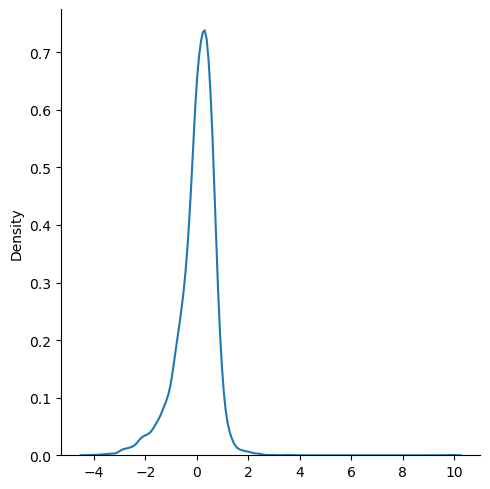

In [24]:
import seaborn as sns
sns.displot(reg_pred - y_test, kind = 'kde')
plt.show()

In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(reg_pred, y_test)

In [28]:
score

0.34513393809439563

#Ridge Regression Algorithm

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV 

In [31]:
ridge_regressor = Ridge()

In [32]:
ridge_regressor

Ridge()

In [37]:
parameters = {'alpha': [1,2,3,10,20,30,40,50,60,70,80,90]}

ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridgecv.best_params_)

{'alpha': 10}


In [39]:
print(ridgecv.best_score_)

-0.5268197392903244


In [40]:
ridge_pred = ridgecv.predict(X_test)

In [41]:
ridge_pred

array([0.72992275, 1.76552226, 2.70688375, ..., 2.07263859, 1.57533029,
       1.82588364])

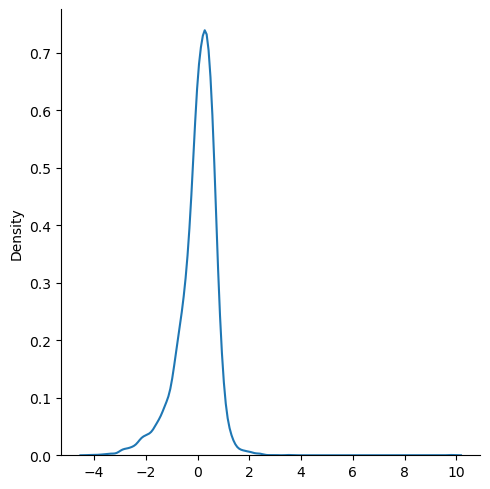

In [42]:
import seaborn as sns
sns.displot(ridge_pred - y_test, kind = 'kde')

In [43]:
score = r2_score(ridge_pred, y_test)

In [44]:
score

0.3425458182224228